# Time Series Simulations

This notebook introduces the time domain simulations used in this project.

Time series are simulated using [neurodsp](https://neurodsp-tools.github.io/). 

In [1]:
from neurodsp.sim import (sim_powerlaw, sim_synaptic_current, sim_knee,
                          sim_oscillation, sim_combined, sim_peak_oscillation)
from neurodsp.utils import set_random_seed
from neurodsp.plts import plot_time_series, plot_timeseries_and_spectra

In [2]:
# Import custom code
import sys; from pathlib import Path
sys.path.append(str(Path('..').resolve()))

from apm.io import APMDB
from apm.plts.settings import EXT
from apm.plts.utils import make_axes
from apm.sim.examples import get_times, get_examples

In [3]:
# Set plot style
import seaborn as sns
sns.set_context('talk')

## Settings

First, we will define some settings for the simulations.

In [4]:
# Set random seed
set_random_seed(111)

In [5]:
# General simulation Settings
n_seconds = 10
fs = 500

# Component parameters
default_exp = -1.0
default_exp2 = -2.0
default_knee = 500
default_freq = 10
default_bw = 1.5
default_height = 1.5
f_range = (1, None)

In [6]:
# Collect together parameters for combined signals
comps_osc = {'sim_powerlaw' : {'exponent' : default_exp},
             'sim_oscillation' : {'freq' : default_freq}}
comps_burst = {'sim_powerlaw' : {'exponent' : default_exp},
               'sim_bursty_oscillation' : {'freq' : default_freq}}
peak_params = {'freq' : default_freq, 'bw' : default_bw, 'height' : default_height}

In [7]:
# Plot settings
plt_kwargs = {'xlabel' : '', 'ylabel' : ''}

In [8]:
# Settings for saving figures
SAVE_FIG = False
FIGPATH = APMDB().figs_path / '11_ts_sims'

### Powerlaw Signal

First, we can simulate a 'powerlaw' signal, a 1/f signal that follow a powerlaw in the frequency domain. 

In [9]:
# Simulate a powerlaw signal
sig_pow = sim_powerlaw(n_seconds, fs, default_exp, f_range=f_range)

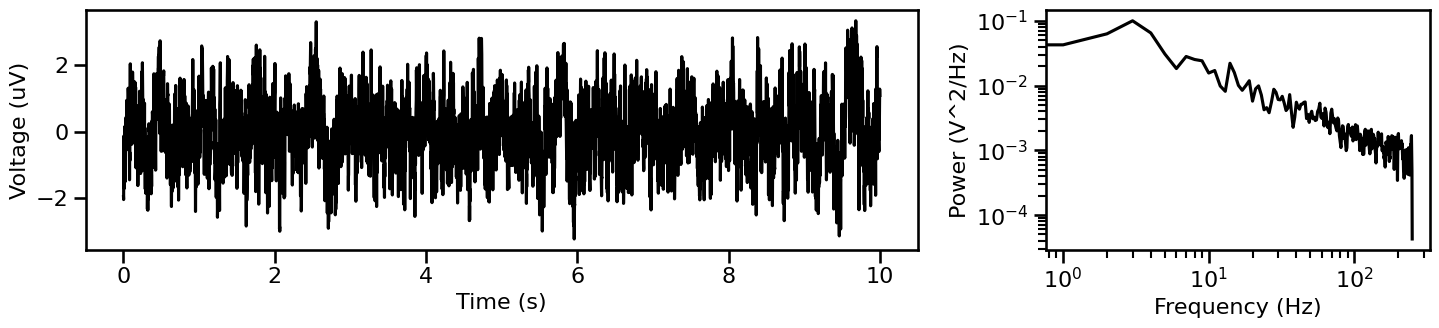

In [10]:
# Plot simulated powerlaw signal and associated power spectrum
plot_timeseries_and_spectra(sig_pow, fs,
                            save_fig=SAVE_FIG, file_name='powerlaw' + EXT, file_path=FIGPATH)

### Continuous Oscillation

Next, we can simulate an  oscillation, in this case, a continuous sinusoid.

In [11]:
# Simulate an oscillation
sig_osc = sim_oscillation(n_seconds, fs, freq=default_freq)

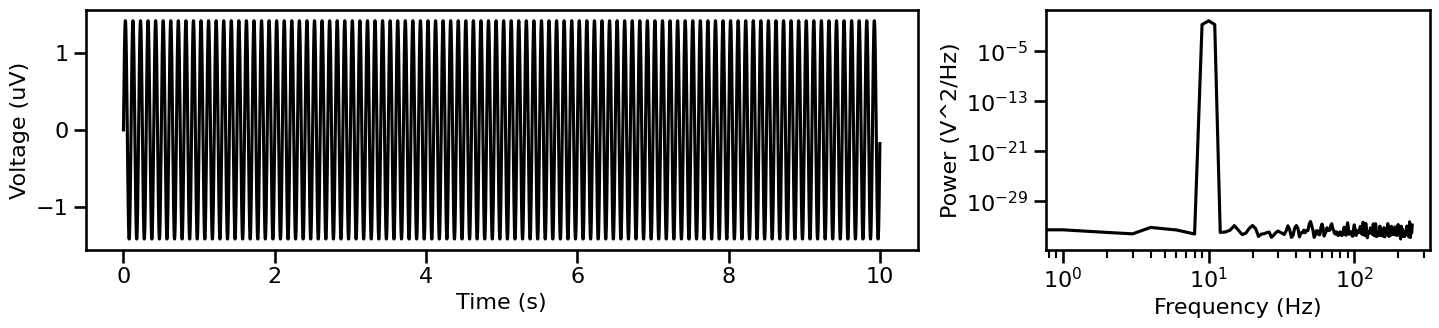

In [12]:
# Plot simulated oscillatory signal and associated power spectrum
plot_timeseries_and_spectra(sig_osc, fs,
                            save_fig=SAVE_FIG, file_name='oscillation' + EXT, file_path=FIGPATH)

### Combined Signal

Now we can can combine the aperiodic and periodic components from above, and create a combined signal.

In [13]:
# Simulate a combined signal, with an aperiodic and a periodic component
sig_comb = sim_combined(n_seconds, fs, comps_osc)

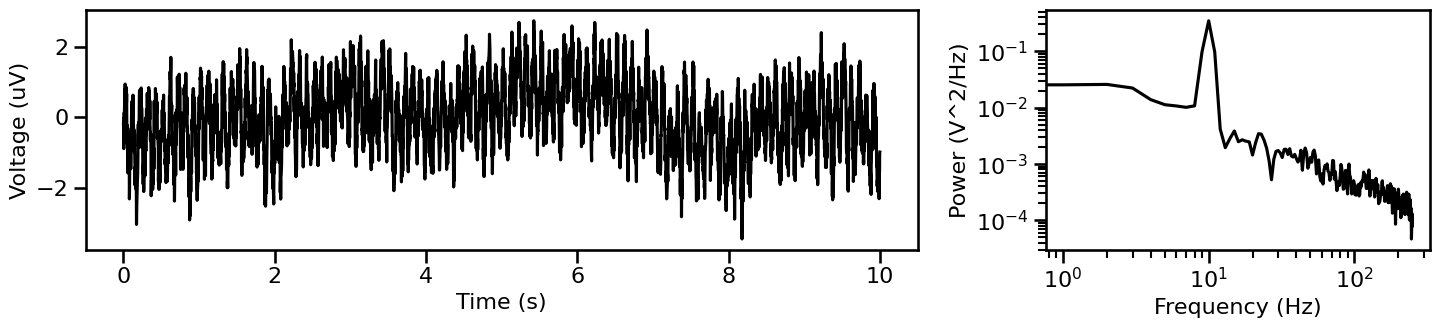

In [14]:
# Plot simulated combined and associated power spectrum
plot_timeseries_and_spectra(sig_comb, fs,
                            save_fig=SAVE_FIG, file_name='combined' + EXT, file_path=FIGPATH)

### Synpatic Signal: Aperiodic Activity with a Knee

There are different possible ways to simulate aperiodic activity.

In this next simulation, we will simulate a 'synpatic current' model, which creates aperiodic activity with a knee.

In [15]:
# Simulate aperiodic activity from a synaptic current model
sig_syn = sim_synaptic_current(n_seconds, fs)

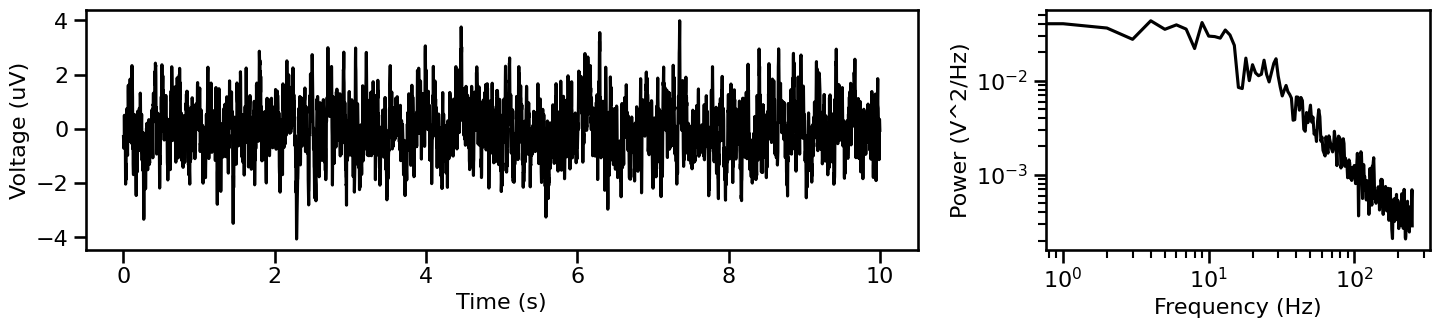

In [16]:
# Plot simulated synaptic signal and associated power spectrum
plot_timeseries_and_spectra(sig_syn, fs,
                            save_fig=SAVE_FIG, file_name='syn_current' + EXT, file_path=FIGPATH)

### Aperiodic Signal with a Knee

We can also simulate signals with a knee without using ane explicit synaptic model.

In [17]:
# Simulate aperiodic activity from a synaptic current model
sig_knee = sim_knee(n_seconds, fs, 0, default_exp2, default_knee)

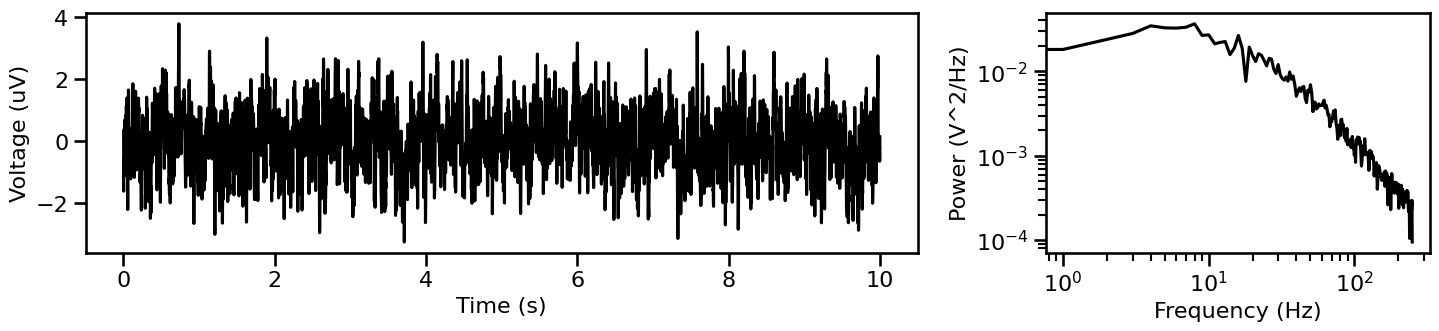

In [18]:
# Plot simulated knee signal and associated power spectrum
plot_timeseries_and_spectra(sig_knee, fs,
                            save_fig=SAVE_FIG, file_name='knee' + EXT, file_path=FIGPATH)

### Bursty Oscillation

Oscillations are also not necessarily continuous. We we will simulate a combined signal with a bursty oscillation.

In [19]:
# Simulate a combined signal with a bursty oscillation
sig_burst = sim_combined(n_seconds, fs, comps_burst)

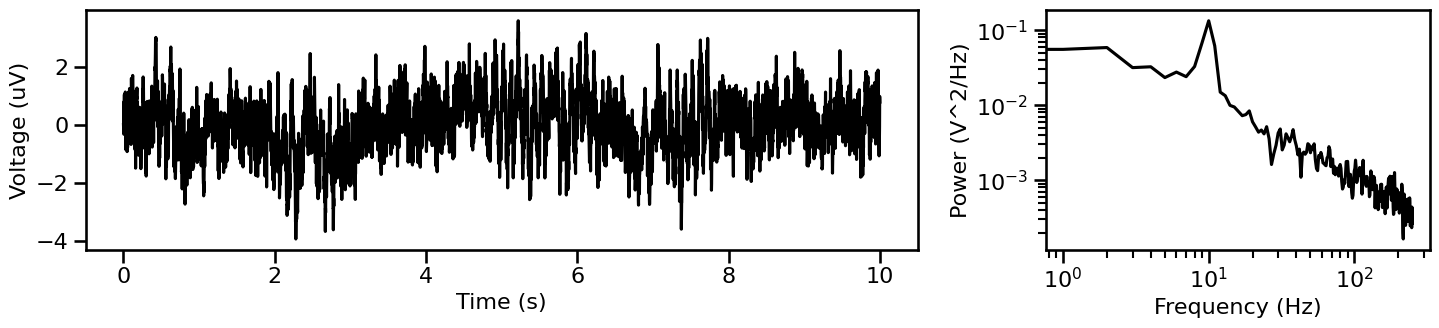

In [20]:
# Plot simulated bursty oscillatory signal and associated power spectrum
plot_timeseries_and_spectra(sig_burst, fs,
                            save_fig=SAVE_FIG, file_name='bursty_osc' + EXT, file_path=FIGPATH)

### Peak Signal

Another dimension that signals can vary in is the bandwidth of a peak. Here, we will create a simulation in which we can specify the bandwidth of an oscillatory peak, that is simulated on top of an aperiodic component.

In [21]:
# Simulate a signal with a peak of a defined bandwidth
sig_peak = sim_peak_oscillation(sig_pow, fs, **peak_params)

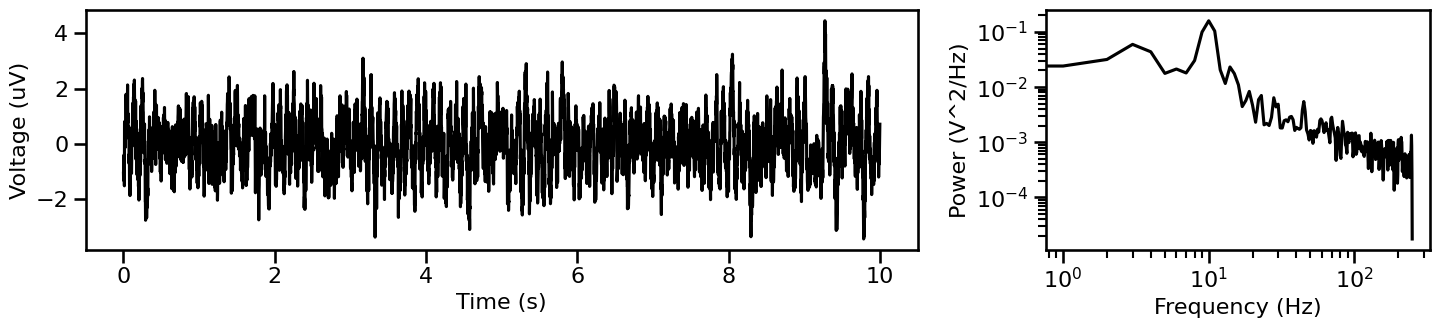

In [22]:
# Plot simulated peak signal and associated power spectrum
plot_timeseries_and_spectra(sig_peak, fs,
                            save_fig=SAVE_FIG, file_name='peak' + EXT, file_path=FIGPATH)

## Example Time Series

In the notebooks that follow, you will see that measures are applied to a set of 'example' time series. 

These examples are time series that have been pre-computed, using the functions above. 

This set of example signals is shown here.

In [23]:
# Get example signals
times = get_times()
examples = get_examples()

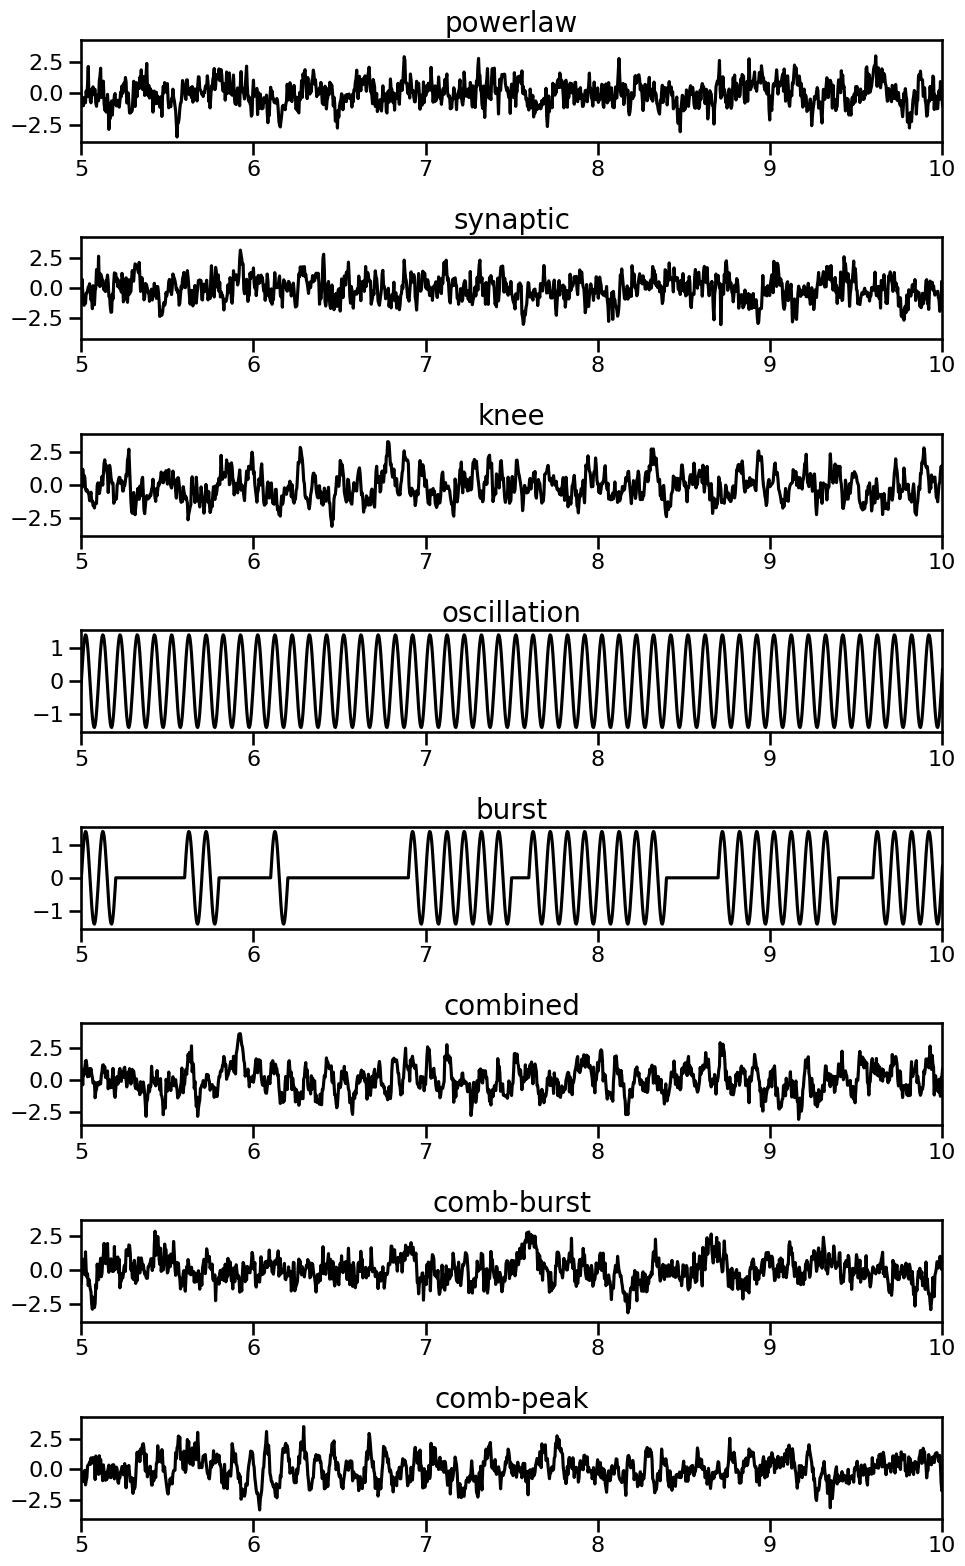

In [24]:
# Plot example signals across different kinds of simulations
axes = make_axes(len(examples), 1, figsize=(10, 2 * len(examples)))
for ind, (label, sig) in enumerate(examples.items()):
    plot_time_series(times, examples[label], title=label, xlim=[5, 10], **plt_kwargs, ax=axes[ind])